In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score      #交叉验证k-fold
from sklearn.ensemble import RandomForestClassifier     #集成模型
from sklearn.model_selection import GridSearchCV     #超参数搜索
from sklearn.metrics import roc_curve,precision_recall_curve,auc #ROC,PR,AUC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,log_loss,confusion_matrix

train = pd.read_excel(r"C:\Users\11389\Desktop\第十一章数据集\教材数据集合\titanic数据\cleaned_train.xlsx")
test = pd.read_excel(r"C:\Users\11389\Desktop\第十一章数据集\教材数据集合\titanic数据\cleaned_test.xlsx")
passengerId = test['PassengerId']
x_train = train.drop(['Survived'],axis=1)
y_train = train['Survived']
x_test = test.drop(['Survived','PassengerId'],axis=1)
display(x_train,y_train)

,Pclass,Age,SibSp,Parch,Fare,isTicketShared,female,male,C,Q,S
0,3,22.0,1,0,7.2500,0,False,True,False,False,True
1,1,38.0,1,0,71.2833,1,True,False,True,False,False
2,3,26.0,0,0,7.9250,0,True,False,False,False,True
3,1,35.0,1,0,53.1000,1,True,False,False,False,True
4,3,35.0,0,0,8.0500,0,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,False,True,False,False,True
887,1,19.0,0,0,30.0000,0,True,False,False,False,True
888,3,13.5,1,2,23.4500,1,True,False,False,False,True
889,1,26.0,0,0,30.0000,0,False,True,True,False,False


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [2]:
rfc = RandomForestClassifier(oob_score=True, random_state=66,n_jobs=-1)
rfc.fit(x_train,y_train)
print('样本内score:%.7f' % rfc.score(x_train,y_train))
print('oob_score:%.7f' % rfc.oob_score_)
print('交叉验证score:%.7f' % np.mean(cross_val_score(rfc,x_train,y_train,cv =5)))


样本内score:0.9809203
oob_score:0.8193042
交叉验证score:0.8069738


In [3]:
rfc = RandomForestClassifier(n_estimators=500, oob_score=True, n_jobs=-1,
max_depth = 7,random_state=66,
min_samples_split = 3,max_features =3,
min_samples_leaf = 2,)
rfc.fit(x_train,y_train)
print('样本内score:%.7f' % rfc.score(x_train,y_train))
print('oob_score:%.7f' % rfc.oob_score_)
print('交叉验证score:%.7f' % np.mean(cross_val_score(rfc,x_train,y_train,cv =5,n_jobs=-1)))


样本内score:0.8810325
oob_score:0.8282828
交叉验证score:0.8237901


In [4]:
y_pred = rfc.predict(x_test)
y_pred= y_pred.astype(int)
pred_df = pd.DataFrame({'PassengerId' : passengerId, 'Survived' : y_pred})
#pred_df.to_csv(r"C:\Users\11389\Desktop\titanic_pred1.csv", index = False)


In [5]:
tempstr = 'accuracy'
param_test1 = {'n_estimators': range(0, 300, 10)}
gsearch1 = GridSearchCV(estimator=RandomForestClassifier(random_state=50),
param_grid=param_test1, scoring=tempstr, 
cv=10,n_jobs=-1)
gsearch1.fit(x_train, y_train)
print('test1平均分数:', gsearch1.cv_results_['mean_test_score'])
print('最优n_estimators:', gsearch1.best_params_)
print('test1最佳得分：', gsearch1.best_score_)
n_estimators = list(gsearch1.best_params_.values())[0]


test1平均分数: [       nan 0.80927591 0.80815231 0.81484395 0.81598002 0.8137578
 0.81710362 0.8171161  0.81821473 0.81933833 0.8182397  0.81598002
 0.8137578  0.81263421 0.8137578  0.81600499 0.81485643 0.81373283
 0.81485643 0.81709114 0.81822722 0.81710362 0.81599251 0.81599251
 0.81822722 0.81599251 0.81599251 0.81485643 0.81710362 0.81598002]
最优n_estimators: {'n_estimators': 90}
test1最佳得分： 0.819338327091136


In [6]:
param_test2 = {'max_depth': range(1, 20)}
gsearch2 = GridSearchCV(estimator=RandomForestClassifier(n_estimators=n_estimators,
random_state=66,n_jobs=-1),
param_grid=param_test2,scoring=tempstr, cv=5,n_jobs=-1)
gsearch2.fit(x_train, y_train)
print('test2平均分数:', gsearch2.cv_results_['mean_test_score'])
print('最优max_deepth:', gsearch2.best_params_)
print('test2最佳得分：', gsearch2.best_score_)
max_depth = list(gsearch2.best_params_.values())[0]


test2平均分数: [0.77668696 0.77556337 0.80245433 0.82041303 0.81480761 0.82267278
 0.83614965 0.83502605 0.82830959 0.82829075 0.82494508 0.82269161
 0.82495763 0.82494508 0.81483899 0.81483899 0.81146821 0.80922729
 0.80362187]
最优max_deepth: {'max_depth': 7}
test2最佳得分： 0.8361496453455526


In [7]:
param_test3 = {'min_samples_split': range(1, 20)}
gsearch3 = GridSearchCV(estimator=RandomForestClassifier(
n_estimators=n_estimators,
max_depth=max_depth,
random_state=66,n_jobs=-1),
param_grid=param_test3,
scoring=tempstr, cv=5,n_jobs=-1)
gsearch3.fit(x_train, y_train)
print('test3平均分数:', gsearch3.cv_results_['mean_test_score'])
print('最优min_samples_split:', gsearch3.best_params_)
print('test3最佳得分：', gsearch3.best_score_)
min_samples_split = list(gsearch3.best_params_.values())[0]


test3平均分数: [       nan 0.83614965 0.83164271 0.82268533 0.82379637 0.82604984
 0.81820978 0.82604984 0.82268533 0.82379637 0.82379637 0.8226665
 0.82604356 0.82829703 0.83277886 0.82604356 0.82267278 0.82155546
 0.81595631]
最优min_samples_split: {'min_samples_split': 2}
test3最佳得分： 0.8361496453455526


In [8]:
param_test4 = {'min_samples_leaf': range(1, 20)}
gsearch4 = GridSearchCV(estimator=RandomForestClassifier(n_estimators=n_estimators, 
max_depth=max_depth,
min_samples_split=min_samples_split,
random_state=66,n_jobs=-1),
param_grid=param_test4, scoring=tempstr, cv=5,n_jobs=-1)
gsearch4.fit(x_train, y_train)
print('test4平均分数:', gsearch4.cv_results_['mean_test_score'])
print('最优min_samples_leaf:', gsearch4.best_params_)
print('test4最佳得分：', gsearch4.best_score_)
min_samples_leaf = list(gsearch4.best_params_.values())[0]


test4平均分数: [0.83614965 0.82493252 0.81819095 0.82491369 0.82379637 0.81930827
 0.81370912 0.81593748 0.81033833 0.81369029 0.80808487 0.80472663
 0.80921474 0.8069801  0.80135585 0.79910866 0.79797878 0.79910866
 0.79799134]
最优min_samples_leaf: {'min_samples_leaf': 1}
test4最佳得分： 0.8361496453455526


In [9]:
param_test5 = {'max_features': range(1, 20)}
gsearch5 = GridSearchCV(estimator=RandomForestClassifier(n_estimators=n_estimators, 
max_depth=max_depth, 
min_samples_split=min_samples_split,
min_samples_leaf=min_samples_leaf,
random_state=66,n_jobs=-1), 
param_grid=param_test5, scoring=tempstr, cv=5,n_jobs=-1)
gsearch5.fit(x_train, y_train)
print('test5平均分数:', gsearch5.cv_results_['mean_test_score'])
print('最优max_features:', gsearch5.best_params_)
print('test5最佳得分：', gsearch5.best_score_)
max_features = list(gsearch5.best_params_.values())[0]


test5平均分数: [0.8271546  0.82603729 0.83614965 0.83164271 0.83391501 0.82717971
 0.82495763 0.83504488 0.82718599 0.83166154 0.82830331 0.82830331
 0.82830331 0.82830331 0.82830331 0.82830331 0.82830331 0.82830331
 0.82830331]
最优max_features: {'max_features': 3}
test5最佳得分： 0.8361496453455526


In [10]:
clf = RandomForestClassifier(n_estimators=n_estimators, 
max_features=max_features,
max_depth= max_depth,
min_samples_leaf=min_samples_leaf, 
min_samples_split=min_samples_split, 
oob_score=True, random_state=66,n_jobs=-1)
clf.fit(x_train,y_train)
y_pred_prob = clf.predict_proba(x_test)[:, 1]
y_pred = clf.predict(x_test)


In [11]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
y_pred = y_pred.astype(int)
pred_df = pd.DataFrame({'PassengerId' : passengerId, 'Survived' : y_pred})
#pred_df.to_csv(r"C:\Users\11389\Desktop\pred_accuracy.csv", index = False)


训练集score:0.9002809
测试集score:0.8659218
oob_score:0.8132022
accuracy:0.8659218
precision:0.8545455
f1_score:0.7966102
log_loss:4.8326686
confusion_matrix:
 [[108   8]
 [ 16  47]]


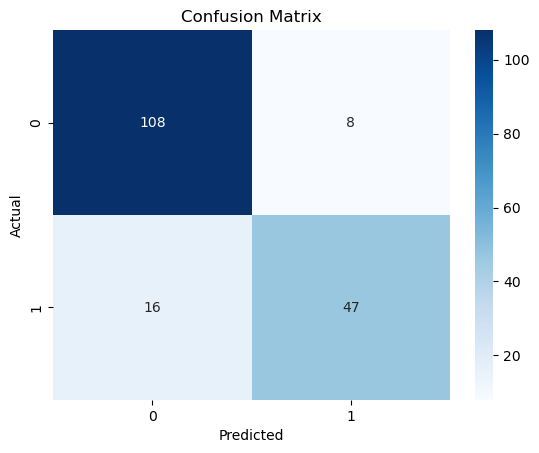

In [12]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x_train,y_train,train_size=0.8,random_state=66)
clf = RandomForestClassifier(n_estimators=n_estimators, 
max_features=max_features,
max_depth= max_depth,
min_samples_leaf=min_samples_leaf, 
min_samples_split=min_samples_split, 
oob_score=True, random_state=66,n_jobs=-1)
clf.fit(x_train1,y_train1)
y_pred_prob1 = clf.predict_proba(x_test1)[:, 1]
y_pred1 = clf.predict(x_test1)
print('训练集score:%.7f' % clf.score(x_train1,y_train1))
print('测试集score:%.7f' % clf.score(x_test1,y_test1))
print('oob_score:%.7f' % clf.oob_score_)
print('accuracy:%.7f' % accuracy_score(y_test1, y_pred1))
print('precision:%.7f' % precision_score(y_test1, y_pred1))
print('f1_score:%.7f' % f1_score(y_test1, y_pred1))
print('log_loss:%.7f' % log_loss(y_test1, y_pred1))
cm1 = confusion_matrix(y_test1, y_pred1)
print('confusion_matrix:\n',cm1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


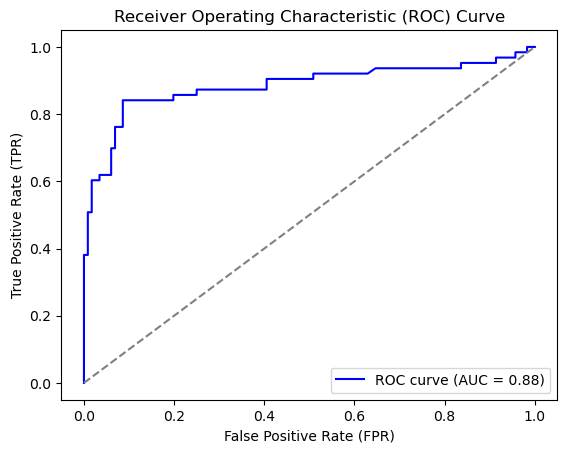

In [13]:
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_prob1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.show()


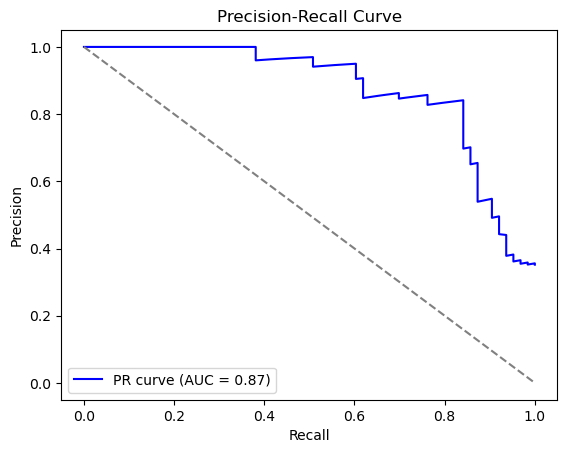

In [14]:
precision, recall, thresholds = precision_recall_curve(y_test1, y_pred_prob1)
pr_auc = auc(recall, precision)
plt.plot(recall, precision, color='blue', label=f'PR curve (AUC = {pr_auc:.2f})')
plt.plot([0, 1], [1, 0], color='gray', linestyle='--')  # 随机分类器的基准线
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()


In [15]:
print('cv_precisiony:%.7f' % np.mean(cross_val_score(clf,x_train,y_train,cv=5,n_jobs=-1,scoring='accuracy')))
print('cv_precisiony:%.7f' % np.mean(cross_val_score(clf,x_train,y_train,cv=5,n_jobs=-1,scoring='precision')))
print('cv_recall:%.7f' % np.mean(cross_val_score(clf,x_train,y_train,cv=5,n_jobs=-1,scoring='recall')))
print('cv_F1:%.7f' % np.mean(cross_val_score(clf,x_train,y_train,cv=5,n_jobs=-1,scoring='f1')))


cv_precisiony:0.8361496
cv_precisiony:0.8492826
cv_recall:0.6986786
cv_F1:0.7644526


           Feature  Importance
6           female    0.227871
7             male    0.200140
4             Fare    0.172569
1              Age    0.144172
0           Pclass    0.121383
2            SibSp    0.044882
3            Parch    0.030843
5   isTicketShared    0.018902
8                C    0.015251
10               S    0.015070
9                Q    0.008916


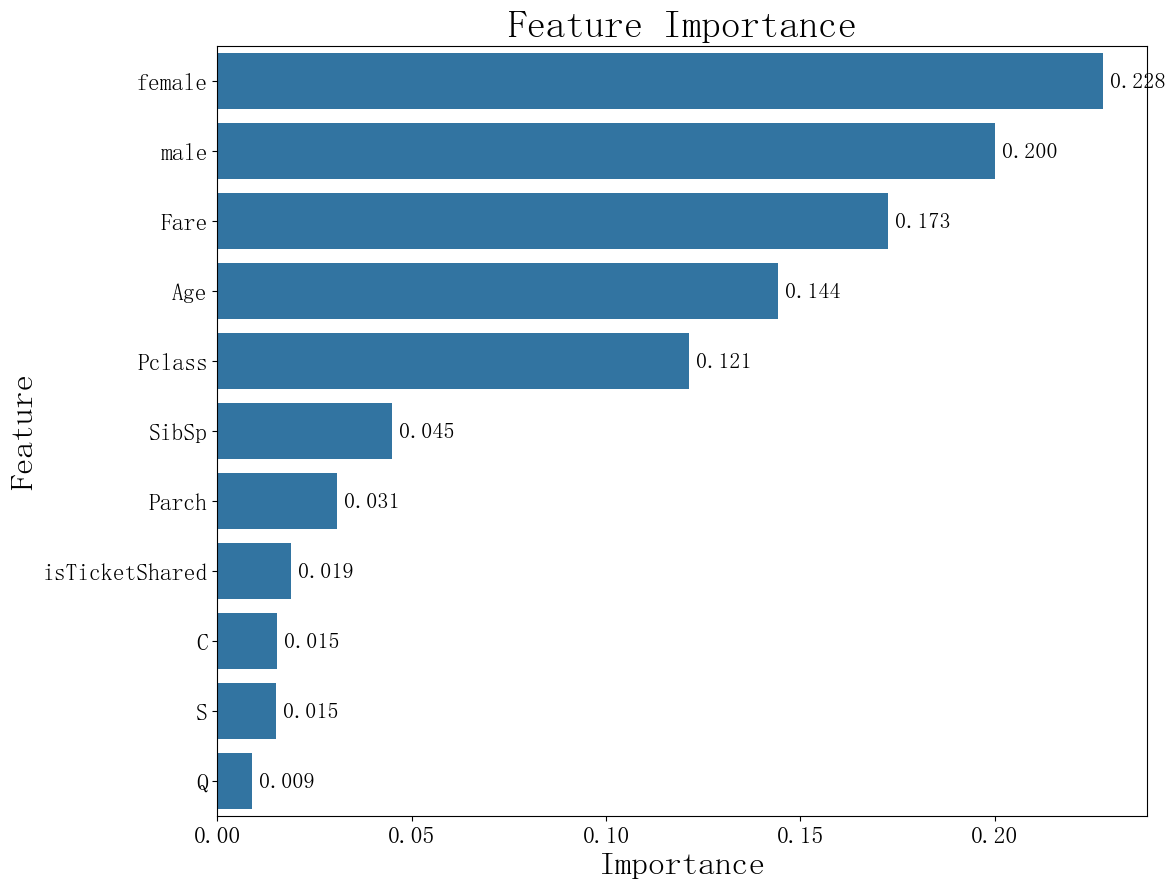

In [18]:
clf.fit(x_train,y_train)
reg_imp = clf.feature_importances_
feature_importance = pd.DataFrame({'Feature': x_train.columns, 'Importance': reg_imp})
# 按重要性得分降序排序
feature_importance_sorted=feature_importance.sort_values('Importance',
ascending=False)
print(feature_importance_sorted)
# 重要性排序画图
plt.figure(figsize=(12, 10))
plt.rcParams['font.size'] = 17  # 设置字体大小
plt.rcParams['font.sans-serif'] = ['SimSun']  # 设置中文字体为宋体
plt.rcParams['font.serif'] = ['Times New Roman']  # 设置英文字体为新罗马
plt.rcParams['axes.unicode_minus'] = False
ax = sns.barplot(x='Importance', y='Feature', data=feature_importance_sorted)
plt.title('Feature Importance', fontsize=28)  # 修改标题字体和大小
plt.xlabel('Importance', fontsize=24)  # 修改横轴标签字体和大小
plt.ylabel('Feature', fontsize=24)  # 修改纵轴标签字体和大小
#标注数值
for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_width(), p.get_y() + \
        p.get_height() / 2.), 
        xytext=(5, 0), textcoords='offset points', ha='left', va='center', 
        fontsize=16)
plt.show()
